# Assignment 1

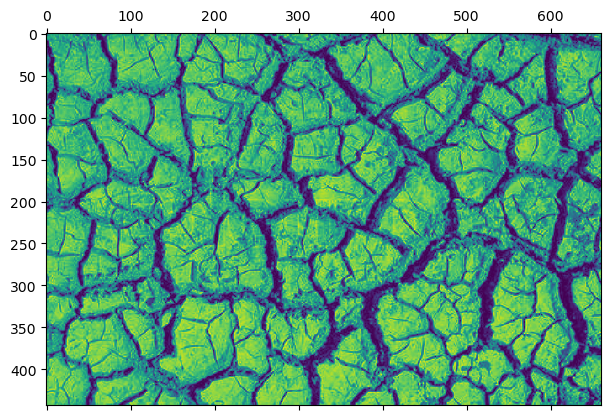

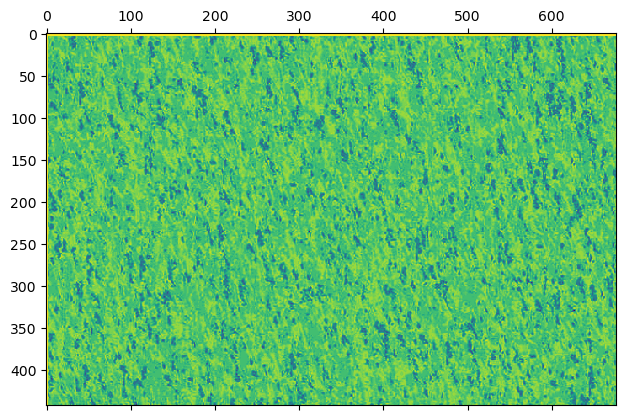

In [1]:
import numpy as np
from skimage import color
import matplotlib.pyplot as plt

def compute_lbp(image, radius=1, n_points=8):
    """Compute Local Binary Pattern (LBP) for a grayscale image."""
    h, w = image.shape
    lbp_image = np.zeros((h, w), dtype=np.uint8)

    # Calculate coordinates of sampling points
    angles = np.linspace(0, 2 * np.pi, n_points, endpoint=False)
    sample_points = np.array([radius * np.cos(angles), -radius * np.sin(angles)]).T
    sample_points = np.round(sample_points).astype(int)

    for y in range(radius, h - radius):
        for x in range(radius, w - radius):
            center_pixel = image[y, x]
            binary_code = 0
            for i, (dx, dy) in enumerate(sample_points):
                # Calculate coordinates of the neighboring pixel
                nx, ny = x + dx, y + dy
                # Compare the intensity of the neighboring pixel with the center pixel
                if image[ny, nx] >= center_pixel:
                    binary_code |= 1 << i
            lbp_image[y, x] = binary_code

    return lbp_image

def hist_lbp(image, radius=1, n_points=8):
    """Compute histogram of Local Binary Patterns (LBP) for a grayscale image."""
    lbp_image = compute_lbp(image, radius, n_points)
    hist, _ = np.histogram(lbp_image, bins=np.arange(0, 256), range=(0, 255))
    return hist

def lbp_feature_vector(image, radius=1, n_points=8):
    """Compute LBP feature vector for a grayscale image."""
    hist = hist_lbp(image, radius, n_points)
    return hist / np.sum(hist)  # Normalize the histogram

# Example usage:
# Load an image
image1 = color.rgb2gray(plt.imread('img1.png')[:,:,:3])
image2 = color.rgb2gray(plt.imread('img2.png')[:,:,:3])
# Compute LBP feature vector
lbp_features = lbp_feature_vector(image1)
lbp_features = lbp_feature_vector(image2)

#print("LBP Feature Vector:", lbp_features)
plt.matshow(image1)
plt.matshow(image2)